# Training the model

The training of the model is arguably one of the most important aspects of the Machine Learning life cycle. It is where ultimately the overall performance of the project is decided, although it is still important that the dataset is large and varied enough to train the model.

# Loading in the data
In the previous pre-processing phase, the data was categorised into 2 arrays and then flattened using numpy, so now that data must be deserialised and loaded into memory

In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

# Setting up the CNN
The CNN (Convolutional Neural Networks) is what will be used to train the model. Convolutional Neural Networks are essentially layers of  neural networks that divide tasks up among them. In this CNN there are 3 convolutional layers with some of them also containing a Relu and MaxPooling layer. As there is a lot of different parameters involved with CNN, they are decribed below in the comments of the code

In [3]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

# Sequential model refers to a model that inputs and outputs sequences of data
model = Sequential()

# To follow is the first Convolutional layer and then ReLU layer
# And MaxPooling Layer

# First convolutional layer 200 kernels size 3 x 3
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:])) 

# Activation function of a node defines output of node when given inputs
# Rectified Linear Unit - Most commonly used activation function in CNN
model.add(Activation('relu'))

# Pooling operation which calculates max value in each patch of each feature map
model.add(MaxPooling2D(pool_size=(2,2)))


# What follows is the second Convolutional layer, with ReLU and MaxPooling layer
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flattening the data is to convert the current data to a 1D array for input 
model.add(Flatten())

# Dropout refers randomly selected neurons are ignored during training
# This is to prevent overfitting, here every 1 in 2 neurons will dropout
model.add(Dropout(0.5))

# Adding a dense layer 
model.add(Dense(50,activation='relu'))

# Final layer with 2 outputs, these outputs refer to with or without mask
model.add(Dense(2,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Splitting the data into training and validation
The dataset cannot just be fed into the CNN for it to work. No, we must also validate its accuracy during the training phase to get a better idea of how well the resulting model works. To do this, the dataset is split into 2 categories: Training and validation data. Essentially what happens is that the training data is what is used to train the model. This is a majority of the dataset,usually around 80-90% of the data is used for training. The validation data is a much smaller sample size that is used to to verify the results of the training data. In this case, the test size being used is 0.2 meaning that 20% of the dataset is being used for validation

In [10]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

# Running the training algorithm
Now that the CNN is set up, and the dataset has been split into training data and validation data, the actual training is ready to begin. This phase is where the majority of the computations are done. How it works is that the dataset is searched through to find any similarities for each category and a model is produced. In this case the 'with_mask' category of images will be searched through and the similarity will of course be if a person is wearing a mask. The model that is generated will then be evaluated on validaton dataset that was made earlier. It is here where the true accuracy of the model will be learned. Each epoch or 'step' in the training process will generate a new model, each one (ideally) improving on the one that came before. For demonstration purposes, 10 epochs were ran as the model although it is essential that a high number of epochs are used to get the most accurate result possible

In [11]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=False,mode='auto')
history=model.fit(train_data,train_target,epochs=10,callbacks=[checkpoint],validation_split=0.3)

Epoch 1/10
28/28 [==============================] - 18s 642ms/step - loss: 0.1674 - accuracy: 0.9657 - val_loss: 0.2273 - val_accuracy: 0.9126
Epoch 2/10
28/28 [==============================] - 19s 694ms/step - loss: 0.0766 - accuracy: 0.9771 - val_loss: 0.2079 - val_accuracy: 0.9336
Epoch 3/10
28/28 [==============================] - 19s 694ms/step - loss: 0.0544 - accuracy: 0.9840 - val_loss: 0.1706 - val_accuracy: 0.9476
Epoch 4/10
28/28 [==============================] - 19s 691ms/step - loss: 0.0619 - accuracy: 0.9760 - val_loss: 0.1582 - val_accuracy: 0.9510
Epoch 5/10
28/28 [==============================] - 20s 713ms/step - loss: 0.0257 - accuracy: 0.9920 - val_loss: 0.1829 - val_accuracy: 0.9510
Epoch 6/10
28/28 [==============================] - 20s 697ms/step - loss: 0.0242 - accuracy: 0.9920 - val_loss: 0.1784 - val_accuracy: 0.9545
Epoch 7/10
28/28 [==============================] - 20s 702ms/step - loss: 0.0223 - accuracy: 0.9954 - val_loss: 0.2065 - val_accuracy: 0.9615

# Visualising the results of the model
It may be overwhelming looking at all of the models to determine which one is the most accurate, especially if there is hundreds or thousands of epochs ran, nevermind 10. That is were the matplotlab comes in. It plots the percantage of accuracy and loss for each epoch, turning it into a graph that is easily readable to a human. From here it makes it much easier to decide on which model was the best out of all the epochs.

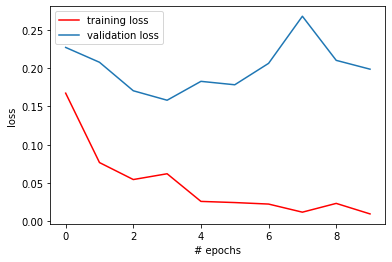

In [12]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

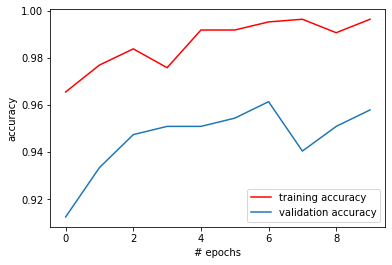

In [14]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()